# Machine Learning Algorithms

In [ ]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("adult.csv")
df.head()
df.shape

(48842, 15)

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [8]:
df['workclass']=df['workclass'].replace('?',np.nan)
df['occupation']=df['occupation'].replace('?',np.nan)
df['native-country']=df['native-country'].replace('?',np.nan)

In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [11]:
df.dropna(how='any',inplace=True)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
df = df.drop_duplicates()
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [13]:
df.shape

(45175, 15)

1. K-Nearest Neighbors (KNN)
Implement a K-Nearest Neighbors (KNN) classifier. Experiment with different values for k (e.g.,
1, 3, 5, 7, 9). Evaluate the model using the specified metrics.
Specific Instructions:
1. Train the KNN classifier for each value of k and evaluate the model performance.
2. Report the best-performing k based on evaluation metrics.
3. Include plots for accuracy and error metrics across different values of k.

In [15]:
from sklearn import preprocessing

label_columns = ['gender', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country', 'income']

label_encoder = preprocessing.LabelEncoder()

for col in label_columns:
    df[col] = label_encoder.fit_transform(df[col])

C:\Users\mujta\AppData\Local\Temp\ipykernel_20532\1841118460.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
C:\Users\mujta\AppData\Local\Temp\ipykernel_20532\1841118460.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])
C:\Users\mujta\AppData\Local\Temp\ipykernel_20532\1841118460.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn import metrics

In [17]:
X = df.drop(columns={"income"},axis=1)
y = df["income"].values.reshape(-1,1)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
X_train = min_max.fit_transform(X_train)
X_test = min_max.fit_transform(X_test)

In [178]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc_list = []
error = []

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error.append(1-metrics.accuracy_score(y_test,y_pred))
    acc = accuracy_score(y_test, y_pred)
    acc_list.append(acc)

print(acc_list)

C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[0.7926950747094632, 0.811732152739347, 0.814388489208633, 0.8189263973436636, 0.8223574986164914, 0.8263420033204206, 0.8251245157719977, 0.823021582733813, 0.8268954067515218, 0.8299944659656889, 0.8303265080243497, 0.8297731045932485, 0.830879911455451, 0.8335362479247371, 0.8323187603763144, 0.8327614831211954, 0.8339789706696181, 0.8333148865522966, 0.8327614831211954]


In [22]:
import matplotlib.pyplot as plt

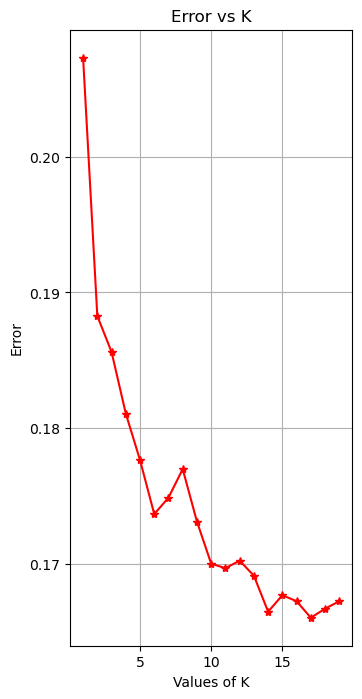

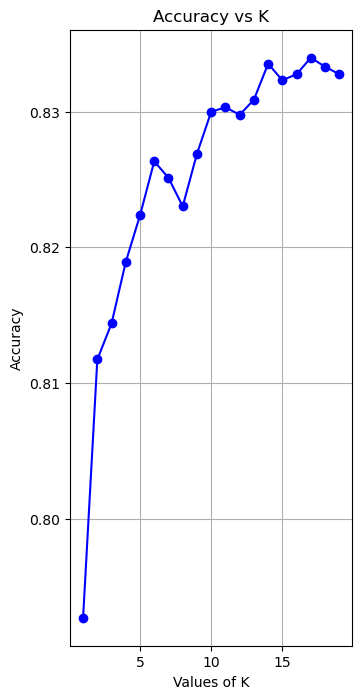

In [23]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(1,20),error,'red',marker='*')
plt.xlabel('Values of K')
plt.ylabel('Error')
plt.grid()
plt.title('Error vs K')

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 2)
plt.plot(range(1, 20), acc_list, 'blue', marker='o')
plt.xlabel('Values of K')
plt.ylabel('Accuracy')
plt.grid()
plt.title('Accuracy vs K')
plt.show()

In [24]:
K=20
knn= KNeighborsClassifier(K)
knn.fit(X_train,y_train)
y_pred =knn.predict(X_test)
print("Accuracy :" ,metrics.accuracy_score(y_test,y_pred))

C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy : 0.8330935251798561


In [25]:
parameters = {"n_neighbors":range(1,20)}
grid_kn=GridSearchCV(estimator=knn,param_grid=parameters,scoring='accuracy',cv= 10,verbose= 1,n_jobs= -1)
grid_kn.fit(X_train,y_train.ravel())

Fitting 10 folds for each of 19 candidates, totalling 190 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=20), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 20)}, scoring='accuracy',
             verbose=1)

In [26]:
grid_kn.best_params_

{'n_neighbors': 17}

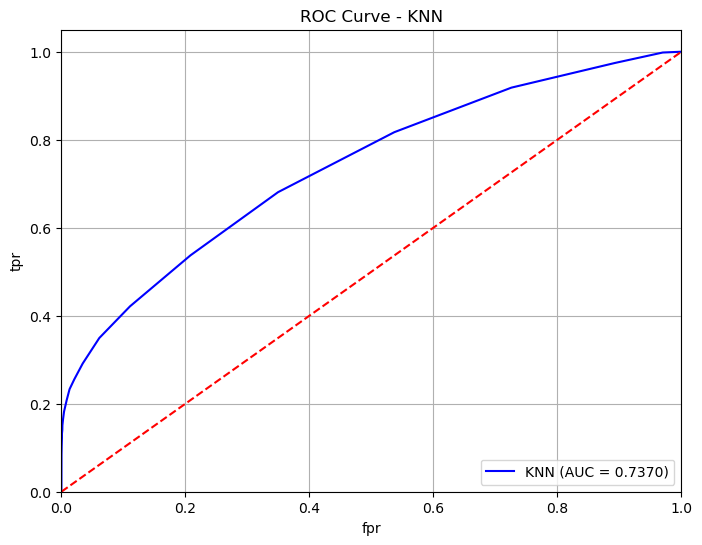

In [172]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt 

def plot_roc_auc(clf, X_test, y_test, model_name):
    y_test_proba = clf.predict_proba(X_test)[:, 1] 
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    auc_score = roc_auc_score(y_test, y_test_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'{model_name} (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

plot_roc_auc(knn, X_test, y_test, 'KNN')

2. Decision Tree
Implement a Decision Tree classifier. Explore different configurations (e.g., varying tree depth
and minimum samples per leaf). Evaluate the model based on the given metrics.
Specific Instructions:
1. Train the Decision Tree classifier with various configurations.
2. Report the configuration that yields the best performance.
3. Include plots for accuracy and error metrics across different configurations.

In [27]:
df1 = pd.read_csv("adult.csv")

In [28]:
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [29]:
df1.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [30]:
df1['workclass']=df1['workclass'].replace('?',np.nan)
df1['occupation']=df1['occupation'].replace('?',np.nan)
df1['native-country']=df1['native-country'].replace('?',np.nan)

In [31]:
df1.dropna(how='any',inplace=True)
df1.shape

(45222, 15)

In [32]:
df1.drop_duplicates()
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [33]:
from sklearn.preprocessing import OrdinalEncoder

In [34]:
columns = ['workclass', 'education', 'marital-status','occupation','relationship','race','gender','native-country']

In [35]:
oe = OrdinalEncoder()
df1[columns] = oe.fit_transform(df1[columns])

In [36]:
df1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2.0,226802,1.0,7,4.0,6.0,3.0,2.0,1.0,0,0,40,38.0,<=50K
1,38,2.0,89814,11.0,9,2.0,4.0,0.0,4.0,1.0,0,0,50,38.0,<=50K
2,28,1.0,336951,7.0,12,2.0,10.0,0.0,4.0,1.0,0,0,40,38.0,>50K
3,44,2.0,160323,15.0,10,2.0,6.0,0.0,2.0,1.0,7688,0,40,38.0,>50K
5,34,2.0,198693,0.0,6,4.0,7.0,1.0,4.0,1.0,0,0,30,38.0,<=50K


In [37]:
X = df1.drop(['income'], axis=1)

y = df1['income']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [39]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=0)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [40]:
y_pred = dt.predict(X_test)

In [41]:
y_pred_train = dt.predict(X_train)

y_pred_train

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [42]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 0.8178


In [43]:
print('Training set score: {:.4f}'.format(dt.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(dt.score(X_test, y_test)))

Training set score: 0.8222
Test set score: 0.8178


[Text(0.5, 0.8333333333333334, 'x[7] <= 0.5\ngini = 0.372\nsamples = 36177\nvalue = [27241, 8936]'),
 Text(0.25, 0.5, 'x[4] <= 12.5\ngini = 0.496\nsamples = 14883\nvalue = [8088.0, 6795.0]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.449\nsamples = 10440\nvalue = [6884, 3556]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.395\nsamples = 4443\nvalue = [1204.0, 3239.0]'),
 Text(0.75, 0.5, 'x[10] <= 7055.5\ngini = 0.181\nsamples = 21294\nvalue = [19153, 2141]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.147\nsamples = 20796\nvalue = [19138, 1658]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.058\nsamples = 498\nvalue = [15, 483]')]

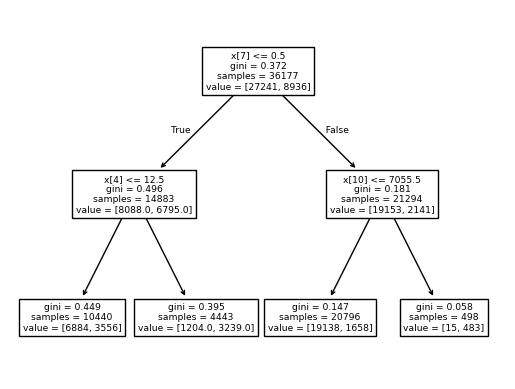

In [44]:
from sklearn import tree
tree.plot_tree(dt.fit(X_train, y_train)) 

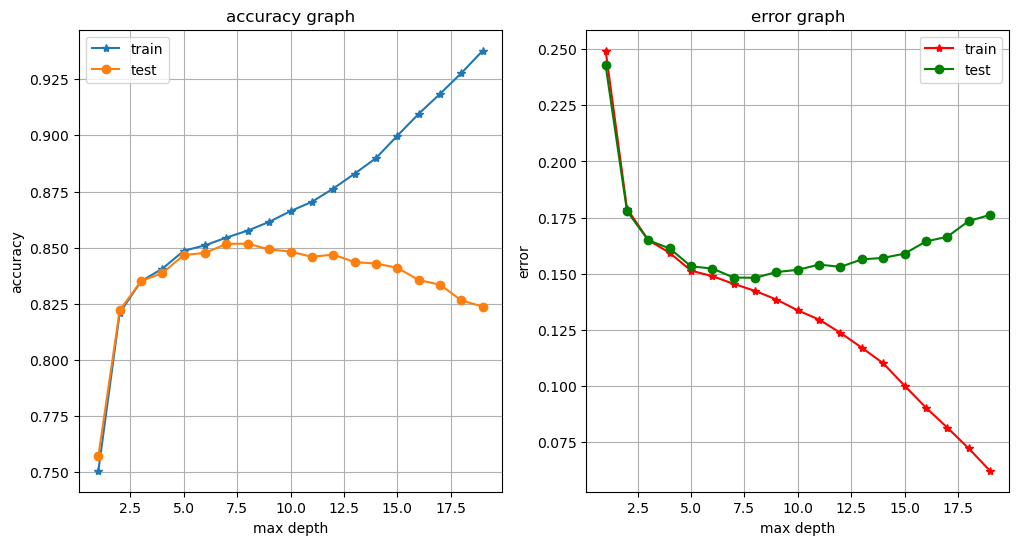

In [180]:
max_depths = range(1,20)
train_acc_list, test_acc_list = [], []

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=0).fit(X_train, y_train)
    train_acc_list.append(accuracy_score(y_train, dt.predict(X_train)))
    test_acc_list.append(accuracy_score(y_test, dt.predict(X_test)))

plt.figure(figsize=(12, 6))

#accuracy plot
plt.subplot(1, 2, 1)
plt.plot(max_depths, train_acc_list, label='train', marker='*')
plt.plot(max_depths, test_acc_list, label='test', marker='o')
plt.xlabel('max depth'); plt.ylabel('accuracy'); plt.legend(); plt.grid(); plt.title('accuracy graph')

#error plot
plt.subplot(1, 2, 2)
plt.plot(max_depths, [1-acc for acc in train_acc_list], label='train', marker='*', color='red')
plt.plot(max_depths, [1-acc for acc in test_acc_list], label='test', marker='o', color='green')
plt.xlabel('max depth'); plt.ylabel('error'); plt.legend(); plt.grid(); plt.title('error graph')

plt.show()
plt.show()

In [46]:
best_index = test_acc_list.index(max(test_acc_list))
best_depth = max_depths[best_index]
best_test_accuracy = test_acc_list[best_index]
best_train_accuracy = train_acc_list[best_index]

print(f'Best configuration: max_depth = {best_depth}')
print(f'Training accuracy: {best_train_accuracy:.4f}')
print(f'Test accuracy: {best_test_accuracy:.4f}')

Best configuration: max_depth = 7
Training accuracy: 0.8566
Test accuracy: 0.8479


In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.83      0.95      0.89      6773
        >50K       0.75      0.41      0.53      2272

    accuracy                           0.82      9045
   macro avg       0.79      0.68      0.71      9045
weighted avg       0.81      0.82      0.80      9045



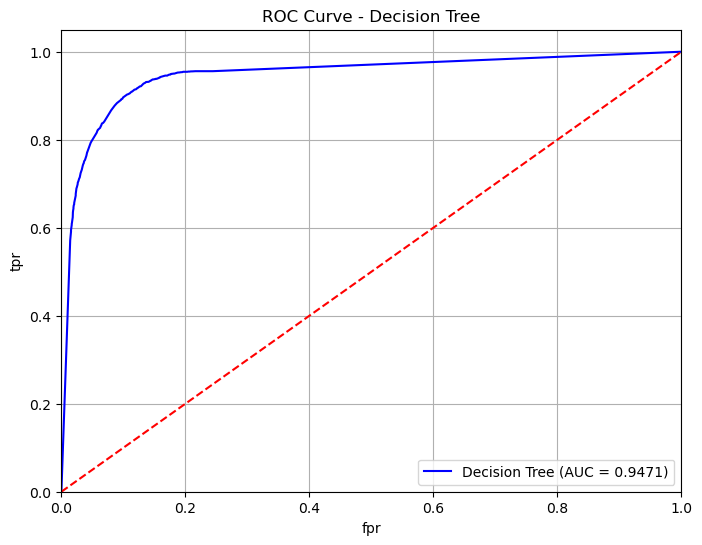

In [173]:
plot_roc_auc(dt, X_test, y_test, 'Decision Tree')

3. Random Forest
Implement a Random Forest classifier. Experiment with different numbers of trees and
maximum tree depth. Evaluate the model with the specified metrics.
Specific Instructions:
1. Train the Random Forest classifier with varying numbers of trees and tree depth.
2. Report the configuration that provides the best performance.
3. Include plots for accuracy and error metrics across different configurations.

In [48]:
df2 = pd.read_csv("adult.csv")

In [49]:
df2.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [50]:
df2.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [51]:
df2['workclass']=df2['workclass'].replace('?',np.nan)
df2['occupation']=df2['occupation'].replace('?',np.nan)
df2['native-country']=df2['native-country'].replace('?',np.nan)

In [52]:
df2.dropna(how='any',inplace=True)
df2.shape

(45222, 15)

In [53]:
df2.drop_duplicates()
df2.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [54]:
df2['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [55]:
X = df2.drop(['income'], axis=1)

y = df2['income']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [57]:
X_train.shape, X_test.shape

((30298, 14), (14924, 14))

In [58]:
X_train.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
dtype: object

In [59]:
X_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
5794,40,Private,477345,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,2057,40,Mexico
36413,48,Federal-gov,215389,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40,United-States
27772,30,Private,222162,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,66,United-States
10865,76,Self-emp-not-inc,130585,Some-college,10,Married-civ-spouse,Other-service,Wife,White,Female,0,0,12,United-States
33053,39,Private,108069,Some-college,10,Never-married,Craft-repair,Unmarried,White,Female,0,0,40,United-States


In [60]:
columns2 = ['workclass', 'education', 'marital-status','occupation','relationship','race','gender','native-country']

In [61]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

X_train[columns2] = oe.fit_transform(X_train[columns2])

X_test[columns2] = oe.transform(X_test[columns2])

In [62]:
X_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
5794,40,2.0,477345,5.0,4,2.0,5.0,0.0,4.0,1.0,0,2057,40,25.0
36413,48,0.0,215389,11.0,9,2.0,13.0,0.0,2.0,1.0,0,0,40,38.0
27772,30,2.0,222162,11.0,9,2.0,5.0,0.0,4.0,1.0,0,0,66,38.0
10865,76,4.0,130585,15.0,10,2.0,7.0,5.0,4.0,0.0,0,0,12,38.0
33053,39,2.0,108069,15.0,10,4.0,2.0,4.0,4.0,0.0,0,0,40,38.0


In [63]:
X_test.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
21762,19,4.0,30800,0.0,6,3.0,0.0,4.0,0.0,0.0,0,0,40,38.0
21701,45,2.0,26781,11.0,9,2.0,4.0,0.0,0.0,1.0,0,0,40,38.0
42663,47,2.0,431515,8.0,11,2.0,2.0,0.0,4.0,1.0,0,0,40,38.0
42694,23,2.0,45713,15.0,10,4.0,2.0,2.0,4.0,1.0,0,0,40,38.0
13590,53,1.0,175897,11.0,9,2.0,2.0,0.0,4.0,1.0,0,0,40,38.0


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.8506


In [65]:
feature_scores = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

fnlwgt             0.175287
age                0.149925
capital-gain       0.114399
relationship       0.097046
educational-num    0.086472
hours-per-week     0.084273
marital-status     0.073848
occupation         0.066382
workclass          0.038404
capital-loss       0.036458
education          0.033957
native-country     0.016276
race               0.013871
gender             0.013403
dtype: float64

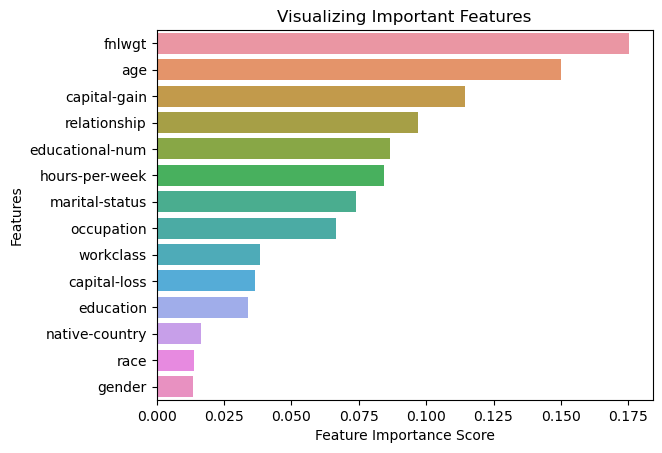

In [66]:
import seaborn as sns
sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

plt.title("Visualizing Important Features")

plt.show()

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier()

criterion = ['gini', 'entropy']
max_depth = list(range(10, 100, 10))
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]
max_features = ['auto', 'sqrt']
bootstrap = [True, False]


rf_hyperparameters = dict(
    criterion=criterion,
    max_depth=max_depth,
    min_samples_leaf=min_samples_leaf,
    min_samples_split=min_samples_split,
    max_features=max_features,
    bootstrap=bootstrap
)

rf_gridsearch = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=rf_hyperparameters,
    cv=3,
    verbose=10
)

rf_gridsearch.fit(X_train, y_train)

rf_gridsearch.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3; 1/10] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2
[CV 1/3; 1/10] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 2/3; 1/10] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2
[CV 2/3; 1/10] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 3/3; 1/10] START bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2
[CV 3/3; 1/10] END bootstrap=True, criterion=gini, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2;, score=nan total time=   0.0s
[CV 1/3; 2/10] START bootstrap=True, criterion=gini, max_depth=40, max_features=auto, min_sample

C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
18 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\mujta\anaconda3\Lib\site-packages\

{'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'criterion': 'gini',
 'bootstrap': True}

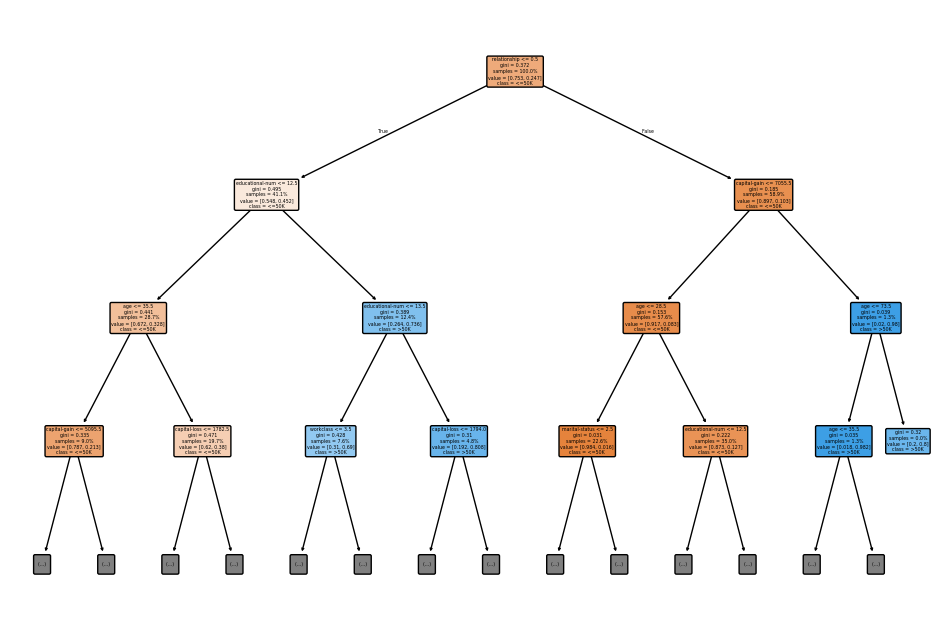

In [68]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

individual_tree = rf_gridsearch.best_estimator_.estimators_[0]  

plt.figure(figsize=(12, 8))

plot_tree(
    individual_tree,
    feature_names=X_train.columns, 
    class_names=['<=50K', '>50K'],
    filled=True,
    rounded=True,
    proportion=True,
    max_depth=3 
)

plt.show()

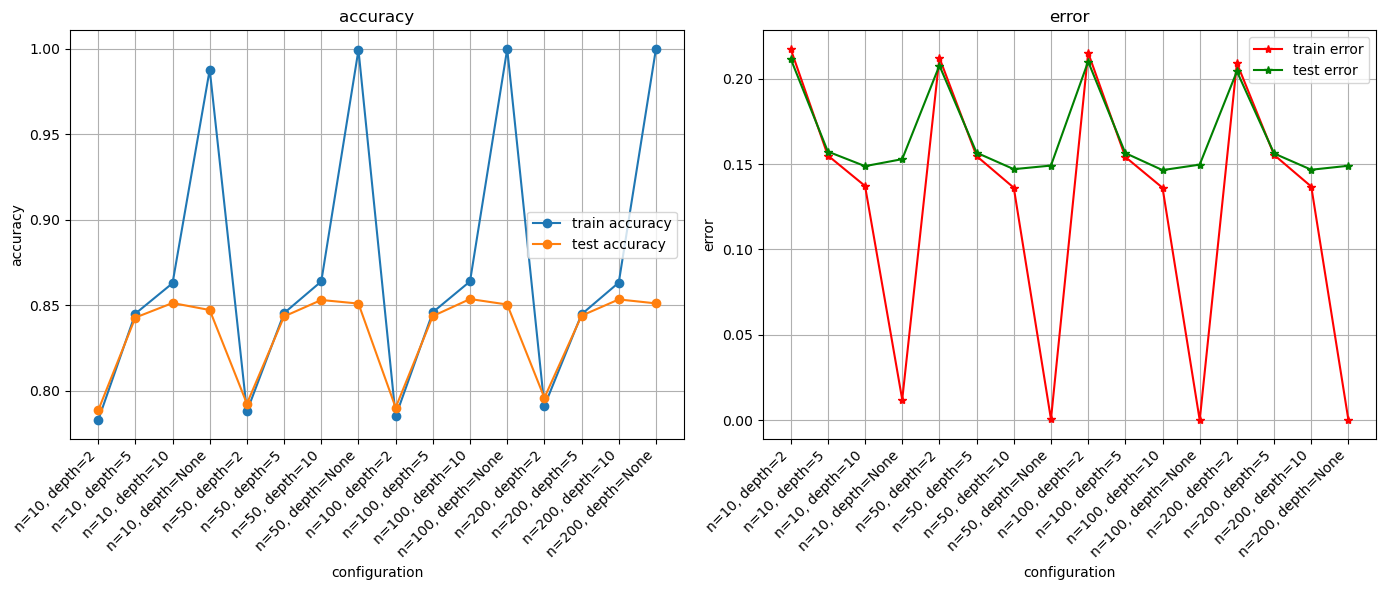

In [182]:
n_trees = [10, 50, 100, 200]  
max_depths = [2, 5, 10, None] 

train_accuracy = []
test_accuracy = []
train_error = []
test_error = []
configurations = []

for n in n_trees:
    for depth in max_depths:
        rf_model = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=0)
        rf_model.fit(X_train, y_train)

        y_train_pred = rf_model.predict(X_train)
        y_test_pred = rf_model.predict(X_test)

        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        
        train_err = 1-train_acc
        test_err = 1-test_acc
        
        train_accuracy.append(train_acc)
        test_accuracy.append(test_acc)
        train_error.append(train_err)
        test_error.append(test_err)
        configurations.append(f'n={n}, depth={depth}')
        
plt.figure(figsize=(14, 6))

#accuracy plot
plt.subplot(1,2,1)
plt.plot(configurations, train_accuracy, label='train accuracy', marker='o')
plt.plot(configurations, test_accuracy, label='test accuracy', marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel('configuration')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.title('accuracy')

#error plot
plt.subplot(1,2,2)
plt.plot(configurations, train_error, label='train error', marker='*', color='red')
plt.plot(configurations, test_error, label='test error', marker='*', color='green')
plt.xticks(rotation=45, ha='right')
plt.xlabel('configuration')
plt.ylabel('error')
plt.legend()
plt.grid()
plt.title('error')

plt.tight_layout()
plt.show()

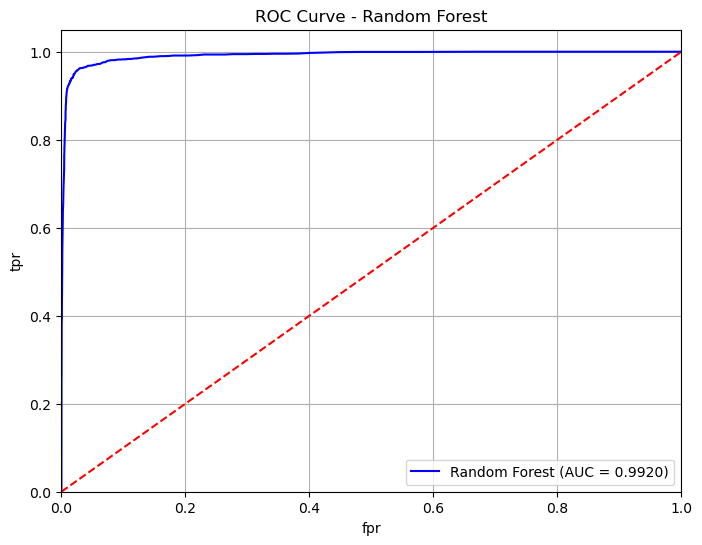

In [174]:
plot_roc_auc(rf_model, X_test, y_test, 'Random Forest')

4. AdaBoost
Implement an AdaBoost classifier. Experiment with different numbers of estimators and base
models. Evaluate the model using the provided metrics.
Specific Instructions:
1. Train the AdaBoost classifier with varying numbers of estimators and base models.
2. Report the configuration that achieves the best performance.
3. Include plots for accuracy and error metrics across different configurations.

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [70]:
df3 = pd.read_csv("adult.csv")

In [71]:
df3.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [72]:
df3['workclass']=df3['workclass'].replace('?',np.nan)
df3['occupation']=df3['occupation'].replace('?',np.nan)
df3['native-country']=df3['native-country'].replace('?',np.nan)

In [73]:
df3.dropna(how='any',inplace=True)
df3.shape

(45222, 15)

In [74]:
df3.drop_duplicates()
df3.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [75]:
X = df.drop(['income'], axis=1)

y = df['income']

In [76]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [78]:
tree = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=None)

ada = AdaBoostClassifier(
    estimator=tree,      
    n_estimators=500,       
    random_state=1,           
    learning_rate=0.1        
)

In [79]:
tree.fit(X_train,y_train)
ada.fit(X_train,y_train)

C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=500, random_state=1)

In [80]:
y_pred = ada.predict(X_test)

C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\mujta\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


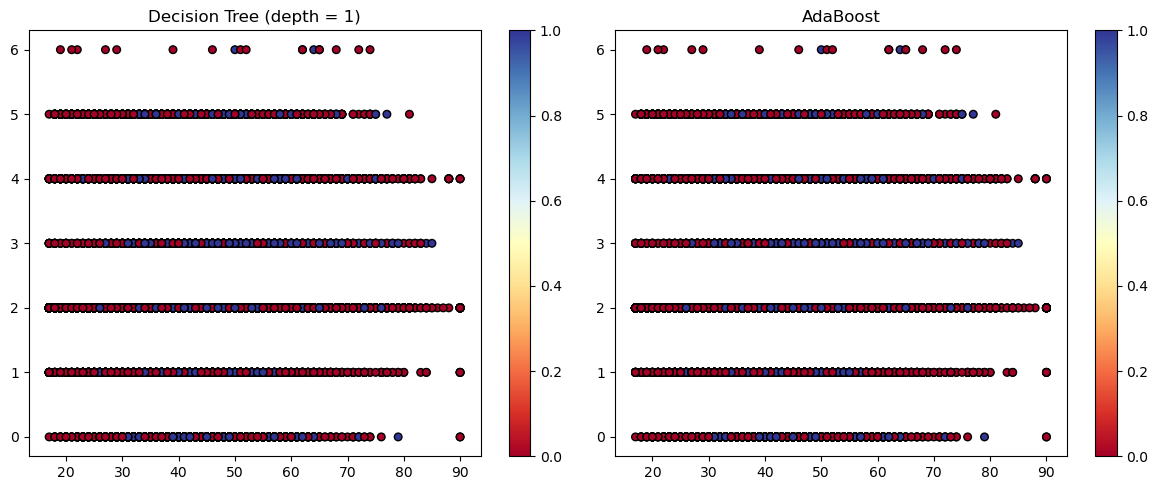

In [88]:
import numpy as np
import matplotlib.pyplot as plt

X_train_np = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
y_train_np = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train

def plot_data_points(X, y, model, ax, title):
    y_pred = model.predict(X)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.RdYlBu, edgecolor='k', s=30)
    ax.set_title(title)
    plt.colorbar(scatter, ax=ax)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

plot_data_points(X_train_np, y_train_np, tree, ax[0], 'Decision Tree (depth = 1)')

plot_data_points(X_train_np, y_train_np, ada, ax[1], 'AdaBoost')

plt.tight_layout()
plt.show()

In [84]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy:.4f}')

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

accuracy: 0.8099
[[5926  882]
 [ 836 1391]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6808
           1       0.61      0.62      0.62      2227

    accuracy                           0.81      9035
   macro avg       0.74      0.75      0.75      9035
weighted avg       0.81      0.81      0.81      9035



5. Stacking
Implement a Stacking classifier using KNN, Decision Tree, and Random Forest as base models,
and a Logistic Regression as the meta-model. Evaluate the stacking model with the given
metrics.
Specific Instructions:
1. Train KNN, Decision Tree, and Random Forest models as base learners.
2. Train a Logistic Regression model as the meta-learner on the predictions of base models.
3. Evaluate the stacking model and report the best performance.
4. Include plots for accuracy and error metrics

In [134]:
df4 = pd.read_csv("adult.csv")

In [135]:
df4.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [136]:
df4.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [137]:
df4['workclass']=df4['workclass'].replace('?',np.nan)
df4['occupation']=df4['occupation'].replace('?',np.nan)
df4['native-country']=df4['native-country'].replace('?',np.nan)

In [138]:
df4.dropna(how='any',inplace=True)
df4.shape

(45222, 15)

In [139]:
df4 = df4.drop_duplicates() 

In [157]:
X1 = df4.drop(['income'], axis=1)

y1 = df4['income']

In [158]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [160]:
from sklearn import preprocessing

label_columns = ['gender', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country', 'income']

label_encoder = preprocessing.LabelEncoder()

for col in label_columns:
    df4[col] = label_encoder.fit_transform(df4[col])

In [161]:
df4.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


In [152]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=10)),
    ('dt',DecisionTreeClassifier(criterion='entropy',max_depth=5))
]

In [162]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression(),
    cv=10
)

In [163]:
clf.fit(X_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('dt',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=5))],
                   final_estimator=LogisticRegression())

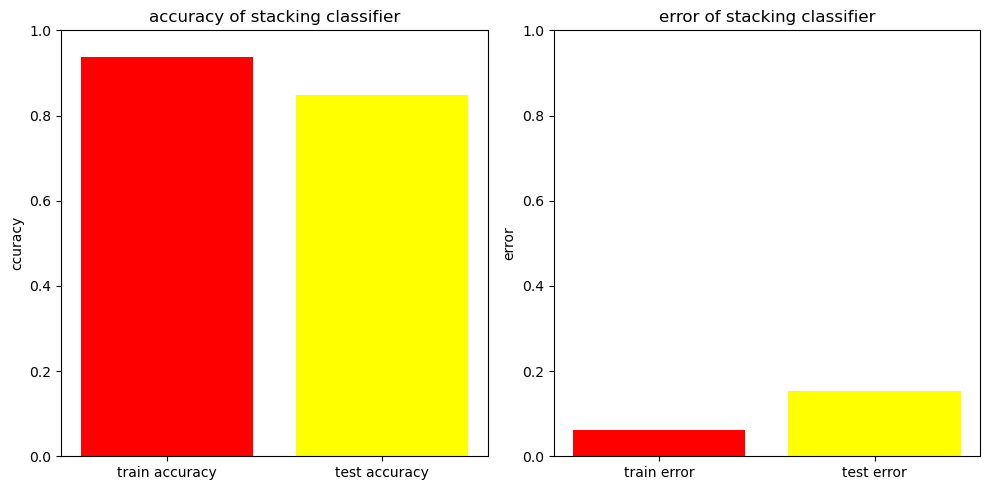

In [177]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_err = 1-train_acc
test_err = 1-test_acc

plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.bar(['train accuracy', 'test accuracy'], [train_acc, test_acc], color=['red', 'yellow'])
plt.ylim(0, 1)
plt.title('accuracy of stacking classifier')
plt.ylabel('ccuracy')

plt.subplot(1, 2, 2)
plt.bar(['train error', 'test error'], [train_err, test_err], color=['red', 'yellow'])
plt.ylim(0, 1)
plt.title('error of stacking classifier')
plt.ylabel('error')

plt.tight_layout()
plt.show()

In [166]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'accuracy  {accuracy:.4f}')
print(conf_matrix)
print('\nclassification report\n')
print(class_report)

accuracy  0.6323
[[5141 1701]
 [1621  572]]

classification report

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      6842
           1       0.25      0.26      0.26      2193

    accuracy                           0.63      9035
   macro avg       0.51      0.51      0.51      9035
weighted avg       0.64      0.63      0.63      9035



auc ccore  0.9004


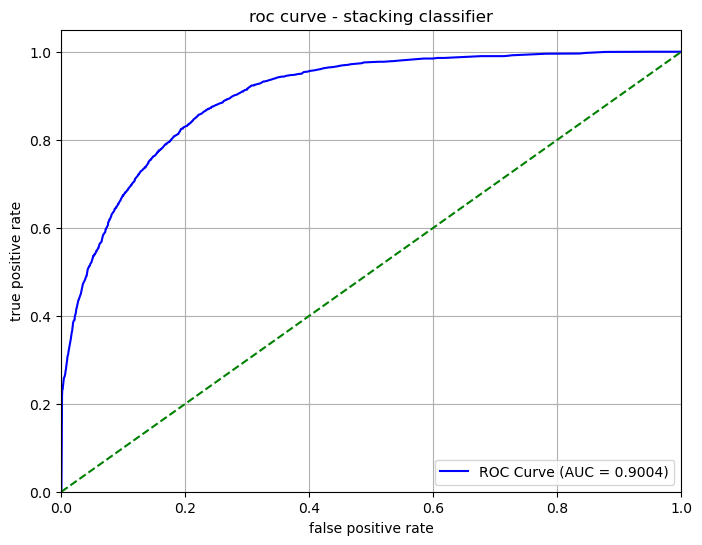

In [170]:
from sklearn.metrics import roc_curve, roc_auc_score

y_test_proba = clf.predict_proba(X_test)[:, 1] 

fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

auc_score = roc_auc_score(y_test, y_test_proba)
print(f'auc ccore  {auc_score:.4f}')

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('roc curve - stacking classifier')
plt.legend(loc='lower right')
plt.grid()
plt.show()